In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dataset= "/content/drive/MyDrive/complaints.csv"

In [9]:
df = pd.read_csv("/content/drive/MyDrive/complaints.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069701 entries, 0 to 4069700
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 558.

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-09-04,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Trouble accessing funds in your mobile or digi...,NaN,NaN,NaN,"Paypal Holdings, Inc",NC,27587,NaN,NaN,Web,2023-09-04,Closed with explanation,Yes,NaN,7493283
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,"EQUIFAX, INC.",FL,33805,NaN,NaN,Web,2023-09-13,In progress,Yes,NaN,7537220


In [ ]:
df.shape

(4069701, 18)

In [ ]:
# Get the unique categorical variables in the 'Sub-product' column, excluding NaN values
unique_sub_products = df['Sub-product'].dropna().unique()

# Print the unique sub-products
print("Unique sub-products in the 'Sub-product' column:")
for sub_product in unique_sub_products:
    print(sub_product)

Unique sub-products in the 'Sub-product' column:
Credit reporting
Checking account
Mobile or digital wallet
Credit card debt
General-purpose credit card or charge card
Savings account
USDA mortgage
Other personal consumer report
Conventional home mortgage
Federal student loan servicing
Loan
Medical debt
FHA mortgage
I do not know
Installment loan
Other debt
Mortgage debt
Foreign currency exchange
Store credit card
Money order, traveler's check or cashier's check
Lease
Payday loan debt
Telecommunications debt
Government benefit card
Domestic (US) money transfer
Other banking product or service
Credit repair services
General-purpose prepaid card
Auto debt
Private student loan
Personal line of credit
Home equity loan or line of credit (HELOC)
International money transfer
VA mortgage
Rental debt
CD (Certificate of Deposit)
Other type of mortgage
Payday loan
Federal student loan debt
Virtual currency
Conventional adjustable mortgage (ARM)
Title loan
Gift card
Check cashing service
Reverse m

In [ ]:
import pandas as pd
import re


# Fill missing values in the 'Sub-product' column with an empty string
df['Sub-product'] = df['Sub-product'].fillna('')

# Define a regex pattern to match categories containing "debt"
pattern = r".*debt.*"

# Use the `str.contains()` method to create a boolean mask
debt_mask = df['Sub-product'].str.contains(pattern, case=False, regex=True)

# Apply the mask to filter the DataFrame
debt_collection_df = df[debt_mask]

# Get unique sub-products from the filtered DataFrame
unique_debt_categories = debt_collection_df['Sub-product'].unique()

# Print the unique categories containing "debt"
for category in unique_debt_categories:
    print(category)


Credit card debt
Medical debt
Other debt
Mortgage debt
Payday loan debt
Telecommunications debt
Auto debt
Rental debt
Federal student loan debt
Debt settlement
Private student loan debt
Student loan debt relief


In [ ]:
debt_collection_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278321 entries, 5 to 4069695
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 278321 non-null  object
 1   Product                       278321 non-null  object
 2   Sub-product                   278321 non-null  object
 3   Issue                         278321 non-null  object
 4   Sub-issue                     277022 non-null  object
 5   Consumer complaint narrative  141859 non-null  object
 6   Company public response       107111 non-null  object
 7   Company                       278321 non-null  object
 8   State                         275142 non-null  object
 9   ZIP code                      275448 non-null  object
 10  Tags                          36038 non-null   object
 11  Consumer consent provided?    250592 non-null  object
 12  Submitted via                 278321 non-null  object
 13

In [ ]:
# Specify the path where you want to save the CSV file
csv_file_path = 'debt_collection_complaints.csv'

# Export the debt_collection_df DataFrame to a CSV file
debt_collection_df.to_csv(csv_file_path, index=False)

print(f'DataFrame has been successfully exported to {csv_file_path}')

DataFrame has been successfully exported to debt_collection_complaints.csv


In [ ]:
import re

# Define a case-insensitive regex pattern to match any string containing "loan" in the "Sub-product" column
consumer_loan_pattern = r".*loan.*"

# Use the `str.contains()` method to create a boolean mask
consumer_loan_mask = df['Sub-product'].str.contains(consumer_loan_pattern, case=False, regex=True)

# Apply the mask to filter the DataFrame for sub-products containing "loan"
consumer_loan_df = df[consumer_loan_mask]

# Specify the path where you want to save the CSV file for "Consumer Loan" sub-products
consumer_loan_csv_file_path = 'consumer_loan_complaints.csv'

# Export the consumer_loan_df DataFrame to a CSV file
consumer_loan_df.to_csv(consumer_loan_csv_file_path, index=False)

print(f'DataFrame for Consumer Loan has been successfully exported to {consumer_loan_csv_file_path}')


DataFrame for Consumer Loan has been successfully exported to consumer_loan_complaints.csv


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-09-04,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Trouble accessing funds in your mobile or digi...,NaN,NaN,NaN,"Paypal Holdings, Inc",NC,27587,NaN,NaN,Web,2023-09-04,Closed with explanation,Yes,NaN,7493283
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,"EQUIFAX, INC.",FL,33805,NaN,NaN,Web,2023-09-13,In progress,Yes,NaN,7537220


In [ ]:
# Get unique sub-products from the filtered DataFrame
unique_customer_loans = consumer_loan_df['Sub-product'].unique()

In [ ]:
# Print the unique categories containing "debt"
for category in unique_customer_loans:
    print(category)

Federal student loan servicing
Loan
Installment loan
Payday loan debt
Private student loan
Home equity loan or line of credit (HELOC)
Payday loan
Federal student loan debt
Title loan
Private student loan debt
Pawn loan
Home equity loan or line of credit
Non-federal student loan
Vehicle loan
Federal student loan
Manufactured home loan
Student loan debt relief


In [ ]:
consumer_loan_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
36,2023-07-15,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,Company believes it acted appropriately as aut...,MOHELA,CA,93551,NaN,Consent not provided,Web,2023-07-15,Closed with non-monetary relief,Yes,NaN,7257101
50,2023-08-30,Vehicle loan or lease,Loan,Getting a loan or lease,Changes in terms mid-deal or after closing,NaN,NaN,Global Lending Services LLC,CO,80216,NaN,NaN,Phone,2023-08-30,Closed with explanation,Yes,NaN,7473888
86,2023-07-03,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,I can not get a clear answer on PSLF timeline ...,Company believes it acted appropriately as aut...,MOHELA,TX,76123,NaN,Consent provided,Web,2023-07-03,Closed with explanation,Yes,NaN,7198941
94,2023-09-07,"Payday loan, title loan, personal loan, or adv...",Installment loan,Getting the loan,NaN,NaN,Company believes the complaint provided an opp...,MEI AUTO FINANCE INC,TX,75231,NaN,NaN,Web,2023-09-11,Closed with explanation,Yes,NaN,7514499
202,2023-09-01,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,Regional Management Corporation,TX,78247,NaN,NaN,Web,2023-09-01,Closed with explanation,Yes,NaN,7488404


In [ ]:
import re

# Define a case-insensitive regex pattern to match variations of "Mortgage" in the "Sub-product" column
mortgage_pattern = r".*mortgage.*"

# Use the `str.contains()` method to create a boolean mask
mortgage_mask = df['Sub-product'].str.contains(mortgage_pattern, case=False, regex=True)

# Apply the mask to filter the DataFrame for sub-products containing "Mortgage"
mortgage_df = df[mortgage_mask]

# Specify the path where you want to save the CSV file for "Mortgage" sub-products
mortgage_csv_file_path = 'mortgage_complaints.csv'

# Export the mortgage_df DataFrame to a CSV file
mortgage_df.to_csv(mortgage_csv_file_path, index=False)

print(f'DataFrame for Mortgage has been successfully exported to {mortgage_csv_file_path}')

DataFrame for Mortgage has been successfully exported to mortgage_complaints.csv


In [ ]:
# Get unique sub-products from the filtered DataFrame
unique_mortage_df = mortgage_df['Sub-product'].unique()

In [ ]:
# Print the unique categories containing "debt"
for category in unique_mortage_df:
    print(category)

USDA mortgage
Conventional home mortgage
FHA mortgage
Mortgage debt
VA mortgage
Other type of mortgage
Conventional adjustable mortgage (ARM)
Reverse mortgage
Other mortgage
Mortgage modification or foreclosure avoidance
Conventional fixed mortgage
Mortgage
Second mortgage


In [ ]:
# Define a list of keywords to search for in the "Sub-product" column
keywords = ["credit", "card", "repair", "other"]

# Use the `str.contains()` method with case-insensitive flag to create a boolean mask
mask = df['Sub-product'].str.contains('|'.join(keywords), case=False)

# Apply the mask to filter the DataFrame for rows containing these keywords
credit_filtered_df = df[mask]

# Specify the path where you want to save the CSV file for these sub-products
csv_file_path = 'credit_card_repair_other_complaints.csv'

# Export the filtered_df DataFrame to a CSV file
credit_filtered_df.to_csv(csv_file_path, index=False)

print(f'DataFrame for Credit, Card, Repair, or Other has been successfully exported to {csv_file_path}')


DataFrame for Credit, Card, Repair, or Other has been successfully exported to credit_card_repair_other_complaints.csv


In [ ]:
# Get unique sub-products from the filtered DataFrame
unique_credit_df = credit_filtered_df['Sub-product'].unique()

In [ ]:
# Print the unique categories containing "debt"
for category in unique_credit_df:
    print(category)

Credit reporting
Credit card debt
General-purpose credit card or charge card
Other personal consumer report
Other debt
Store credit card
Government benefit card
Other banking product or service
Credit repair services
General-purpose prepaid card
Personal line of credit
Home equity loan or line of credit (HELOC)
Other type of mortgage
Gift card
Other mortgage
Payroll card
Other advances of future income
Credit card
Home equity loan or line of credit
Other bank product/service
Other (i.e. phone, health club, etc.)
ID prepaid card
General purpose card
Gift or merchant card
Government benefit payment card
Credit repair
Other special purpose card
Transit card
Student prepaid card
Electronic Benefit Transfer / EBT card


## 4 Different datasets

In [ ]:
credit_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852449 entries, 0 to 4069695
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 413.

In [ ]:
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374299 entries, 25 to 4069698
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 374299 non-null  object
 1   Product                       374299 non-null  object
 2   Sub-product                   374299 non-null  object
 3   Issue                         374299 non-null  object
 4   Sub-issue                     16885 non-null   object
 5   Consumer complaint narrative  106603 non-null  object
 6   Company public response       120642 non-null  object
 7   Company                       374299 non-null  object
 8   State                         369038 non-null  object
 9   ZIP code                      369447 non-null  object
 10  Tags                          66113 non-null   object
 11  Consumer consent provided?    169380 non-null  object
 12  Submitted via                 374299 non-null  object
 1

In [ ]:
debt_collection_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278321 entries, 5 to 4069695
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 278321 non-null  object
 1   Product                       278321 non-null  object
 2   Sub-product                   278321 non-null  object
 3   Issue                         278321 non-null  object
 4   Sub-issue                     277022 non-null  object
 5   Consumer complaint narrative  141859 non-null  object
 6   Company public response       107111 non-null  object
 7   Company                       278321 non-null  object
 8   State                         275142 non-null  object
 9   ZIP code                      275448 non-null  object
 10  Tags                          36038 non-null   object
 11  Consumer consent provided?    250592 non-null  object
 12  Submitted via                 278321 non-null  object
 13

In [ ]:
consumer_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217937 entries, 36 to 4069684
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 217937 non-null  object
 1   Product                       217937 non-null  object
 2   Sub-product                   217937 non-null  object
 3   Issue                         217937 non-null  object
 4   Sub-issue                     143334 non-null  object
 5   Consumer complaint narrative  97736 non-null   object
 6   Company public response       56491 non-null   object
 7   Company                       217937 non-null  object
 8   State                         214631 non-null  object
 9   ZIP code                      215067 non-null  object
 10  Tags                          32159 non-null   object
 11  Consumer consent provided?    153184 non-null  object
 12  Submitted via                 217937 non-null  object
 1

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
from torch.utils.data import Dataset

In [ ]:
import pandas as pd

df = pd.DataFrame()

In [ ]:


import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#preprocessing

df.isnull().sum()

Series([], dtype: float64)

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
 df2 = pd.DataFrame([])

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from scipy import optimize


In [ ]:
corr = df2.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,  annot = True, vmin=-1, vmax=1, center= 0)

In [ ]:
df.reset_index(drop = True).head()

""


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/complaints.csv")
test = pd.read_csv("/content/drive/MyDrive/complaints.csv")

In [ ]:
training_set = train.copy()
test_set = test.copy()

In [ ]:
training_set.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-09-04,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Trouble accessing funds in your mobile or digi...,NaN,NaN,NaN,"Paypal Holdings, Inc",NC,27587,NaN,NaN,Web,2023-09-04,Closed with explanation,Yes,NaN,7493283
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,"EQUIFAX, INC.",FL,33805,NaN,NaN,Web,2023-09-13,In progress,Yes,NaN,7537220


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069701 entries, 0 to 4069700
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 558.

In [ ]:
print('\nNo of features in Trainset:', train.shape[1])
print('\nNo of features in Testset:', test.shape[1])

print('\nfeatures in Trainset:\n-', '\n- '.join(list(train.columns)))
print('\nfeatures in Testset:\n-', '\n- '.join(list(test.columns)))

print('\nfeatures datatypes in Trainset:\n', train.dtypes)
print('\nfeatures datatypes in Testset:\n', test.dtypes)

print('\nEmpty cells in the TrainSet:\n', train.isnull().values.sum())
print('\nEmpty cells in the TestSet:\n', test.isnull().values.sum())


No of features in Trainset: 18

No of features in Testset: 18

features in Trainset:
- Date received
- Product
- Sub-product
- Issue
- Sub-issue
- Consumer complaint narrative
- Company public response
- Company
- State
- ZIP code
- Tags
- Consumer consent provided?
- Submitted via
- Date sent to company
- Company response to consumer
- Timely response?
- Consumer disputed?
- Complaint ID

features in Testset:
- Date received
- Product
- Sub-product
- Issue
- Sub-issue
- Consumer complaint narrative
- Company public response
- Company
- State
- ZIP code
- Tags
- Consumer consent provided?
- Submitted via
- Date sent to company
- Company response to consumer
- Timely response?
- Consumer disputed?
- Complaint ID

features datatypes in Trainset:
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company pu

In [ ]:
# lets count uniques values in each column
unique_cnt = list(map(lambda x: len(training_set[x].unique()), list(training_set)))
print('unique counts in each column:')
dict(zip(list(training_set),unique_cnt))

unique counts in each column:


{'Date received': 4305,
 'Product': 21,
 'Sub-product': 86,
 'Issue': 175,
 'Sub-issue': 267,
 'Consumer complaint narrative': 1248225,
 'Company public response': 12,
 'Company': 6941,
 'State': 64,
 'ZIP code': 33083,
 'Tags': 4,
 'Consumer consent provided?': 5,
 'Submitted via': 7,
 'Date sent to company': 4254,
 'Company response to consumer': 9,
 'Timely response?': 2,
 'Consumer disputed?': 3,
 'Complaint ID': 4069701}

In [ ]:
print(df.head().to_dict())

{}


In [ ]:
def F_Clean(x):
    try:
        return x.split(' ')[0].strip()
    except:
        return np.nan

In [ ]:
import pandas as pd
import datetime
import numpy as np

In [ ]:
df = pd.DataFrame({'A': ['text']*20,
                   'B': [1, 2.2]*10,
                   'C': [True, False]*10,
                   'D': pd.to_datetime('2023-09-20')
                  })

In [ ]:
numeric = df.applymap(lambda x: isinstance(x, (int, float)))
numeric

,A,B,C,D
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
5,False,True,True,False
6,False,True,True,False
7,False,True,True,False
8,False,True,True,False
9,False,True,True,False


In [ ]:
numeric = df.applymap(lambda x: isinstance(x, (int, float)))['B']
numeric

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: B, dtype: bool

In [ ]:
df[~numeric]

,A,B,C,D


In [ ]:
strings = df.applymap(lambda x: isinstance(x, (str)))['A']
strings

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: A, dtype: bool

In [ ]:
df[~strings]

,A,B,C,D


<ipython-input-1-23e806123d62>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


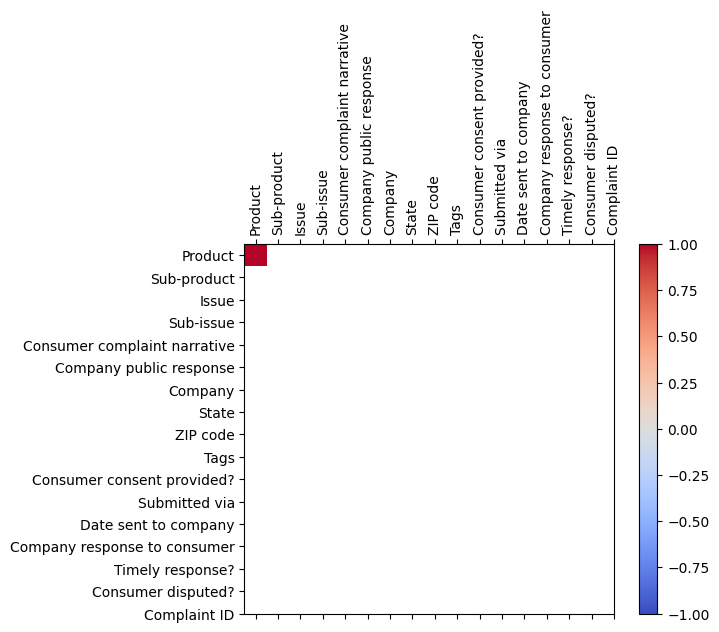

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/complaints.csv', index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig = fig.add_trace(go.Scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16]))
fig.show()

In [ ]:
import pandas as pd

In [ ]:
dat = pd.read_csv("/content/drive/MyDrive/complaints.csv")
print(dat.shape)

(4069701, 18)


In [ ]:
dat.corr()

<ipython-input-10-0c12415e78da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dat.corr()


,Complaint ID
Complaint ID,1.0


In [ ]:
import matplotlib.pyplot as plt

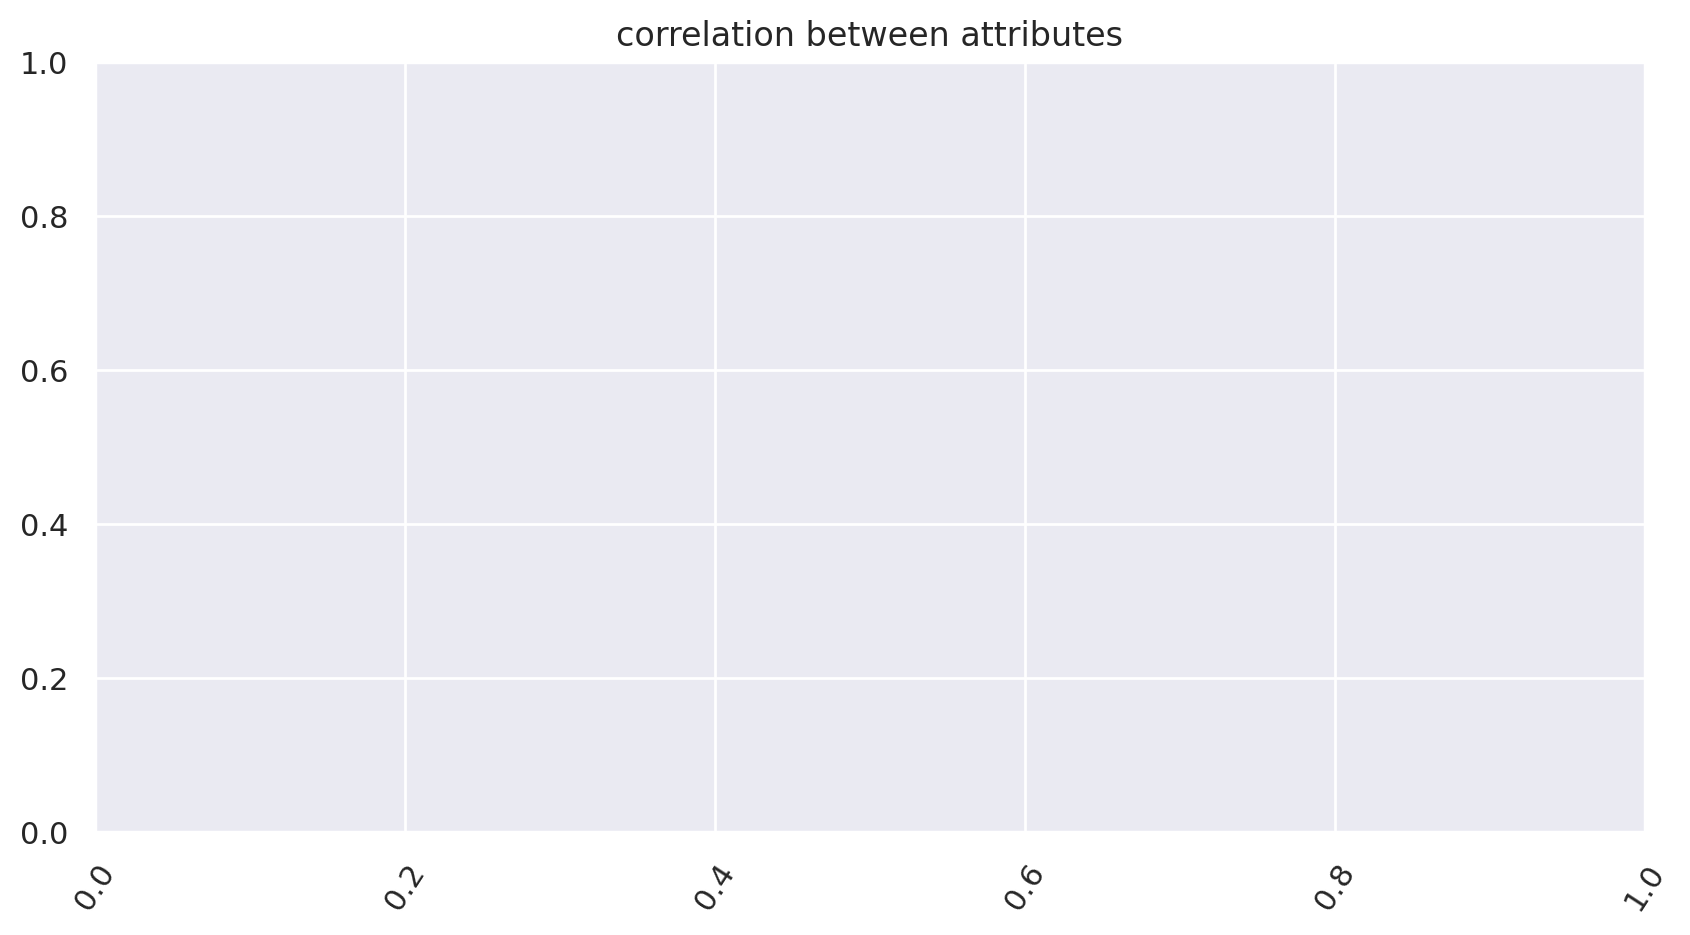

TypeError: ignored

In [ ]:
import numpy as np
from scipy import optimize
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
df2 = df.copy()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df2[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(10, 5),dpi=200)
plt.title('correlation between attributes')

plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df.corr()
plt.scatter(df)
plt.show()
#print(corr_matrix)


In [ ]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')

In [ ]:
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
#TEXT PREPROCESSING

import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values
print("X = ", X, '\n')
print("y = ", y, '\n')

X =  [['Credit reporting, credit repair services, or other personal consumer reports'
  'Credit reporting'
  "Problem with a credit reporting company's investigation into an existing problem"
  ... 'In progress' 'Yes' nan]
 ['Credit reporting or other personal consumer reports'
  'Credit reporting' 'Improper use of your report' ...
  'Closed with explanation' 'Yes' nan]
 ['Checking or savings account' 'Checking account'
  'Problem caused by your funds being low' ... 'Closed with explanation'
  'Yes' nan]
 ...
 ['Mortgage' 'Conventional home mortgage'
  'Applying for a mortgage or refinancing an existing mortgage' ...
  'Closed with explanation' 'Yes' nan]
 ['Debt collection' 'I do not know' 'Attempts to collect debt not owed'
  ... 'Closed with non-monetary relief' 'Yes' nan]
 ['Checking or savings account' 'Checking account' 'Managing an account'
  ... 'Closed with explanation' 'Yes' nan]] 

y =  ['Was not notified of investigation status or results'
 'Reporting company used your repo

In [ ]:
from sklearn import datasets

In [ ]:
!pip install django

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 20.1 MB/s eta 0:00:00


In [ ]:
!pip install django

In [ ]:
for row in datasets:
    data = dict()
    data.update(local_timestamp = row[0])
    data.update(nse_timestamp = float(row[1].strip('"')))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, copy=False, strategy="mean", )
imp = imp.fit(X[:, 1:3])
X[:, 1:3] = imp.transform(X[:, 1:3])
print(X)

In [ ]:
print(df['mortgage'].unique())
print(df['credit_filtered'].unique())
print(df['consumer_loan'].unique())
print(df['debt_collection'].unique())

In [ ]:
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

In [14]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans()
kmeans.fit(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

In [17]:
train_df = pd.read_csv(r'/content/drive/MyDrive/complaints.csv')
test_df = pd.read_csv(r'/content/drive/MyDrive/complaints.csv')

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

RANDOM FOREST REGRESSION MODEL


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

GBT REGRESSOR MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

MODEL PREDICTION

In [ ]:
def prediction(PresentPrice, CarAge, FuelType,SellerType, Transmissionmanual):
    # feature scaling on present price and car age
    scaled_value = scaler.transform([[str(issue), int(ZIP code)]])

    price = scaled_value[0,0]
    age = scaled_value[0,1]

    com = str(company)
    Stat = str(state)
    sub = str(subissue)

    return rf_random.predict([[issue, ZIPcode, company, State, subissue]])